#  <center>  IPL Analysis (2008-2022) </center>


<img src='IPL_image.jpg' />

In [1]:
# importing the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the datasets
matches = pd.read_csv('IPL_Matches_2022_2008.csv',index_col=0)
delivery = pd.read_csv('IPL_Ball_by_Ball_2022_2008.csv',index_col=0)
df = matches.merge(delivery, on ='ID')

In [3]:
matches.head()  # first 5 datapoints in the matches 

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,Narendra Modi Stadium,Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,Narendra Modi Stadium,Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
delivery.head() # first 5 datapoints in the ball_by_ball 

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,1,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,1,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,1,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,1,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,1,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    int64  
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

## -- IPL Trophy Holders

In [7]:
IPL_winners = matches[matches['MatchNumber']== 'Final'][['Season','WinningTeam']].set_index('Season')
IPL_winners 

,WinningTeam
Season,
2022,Gujarat Titans
2021,Chennai Super Kings
2020,Mumbai Indians
2019,Mumbai Indians
2018,Chennai Super Kings
2017,Mumbai Indians
2016,Sunrisers Hyderabad
2015,Mumbai Indians
2014,Kolkata Knight Riders


## -- Number of times a team has won IPL winner title

In [8]:
IPL_winners.value_counts()

WinningTeam          
Mumbai Indians           5
Chennai Super Kings      4
Kolkata Knight Riders    2
Sunrisers Hyderabad      2
Gujarat Titans           1
Rajasthan Royals         1
dtype: int64

## -- Orange Cap Holder

In [9]:
Orange_Cap_Holder = df.groupby(['Season','batter'])['batsman_run'].sum().reset_index().sort_values(by=['Season', 'batsman_run'], ascending=False)
Orange_Cap_Holder = Orange_Cap_Holder.groupby('Season').head(1).set_index('Season')
Orange_Cap_Holder

,batter,batsman_run
Season,,
2022,JC Buttler,863
2021,RD Gaikwad,635
2020,KL Rahul,676
2019,DA Warner,692
2018,KS Williamson,735
2017,DA Warner,641
2016,V Kohli,973
2015,DA Warner,562
2014,RV Uthappa,660


## -- Purple Cap Holder

In [10]:
delivery['kind'].value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: kind, dtype: int64

In [11]:
delivery['kind'].value_counts().keys()

Index(['caught', 'bowled', 'run out', 'lbw', 'stumped', 'caught and bowled',
       'hit wicket', 'retired hurt', 'obstructing the field', 'retired out'],
      dtype='object')

In [12]:
dismissal=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']# only in these cases the wicket credit is given to bowler

In [13]:
out=df[df['kind'].isin(dismissal)]

In [14]:
Purple_Cap_Holder = out.groupby(['Season','bowler'])['kind'].count().reset_index().sort_values(by=['Season', 'kind'], ascending=False)
Purple_Cap_Holder = Purple_Cap_Holder.groupby('Season').head(1).set_index('Season')
Purple_Cap_Holder.rename(columns={'kind':'number_of_wickets'})

,bowler,number_of_wickets
Season,,
2022,YS Chahal,27
2021,HV Patel,32
2020,K Rabada,32
2019,Imran Tahir,26
2018,AJ Tye,24
2017,B Kumar,26
2016,B Kumar,23
2015,DJ Bravo,26
2014,MM Sharma,23


## -- player of match in final match in each season

In [15]:
matches[matches['MatchNumber']== 'Final'].reset_index()[['Season','Player_of_Match']].set_index('Season')

,Player_of_Match
Season,
2022,HH Pandya
2021,F du Plessis
2020,TA Boult
2019,JJ Bumrah
2018,SR Watson
2017,KH Pandya
2016,BCJ Cutting
2015,RG Sharma
2014,MK Pandey


In [16]:
matches['Team1'].value_counts()

Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Sunrisers Hyderabad            108
Kolkata Knight Riders          105
Rajasthan Royals                89
Pune Warriors                   23
Gujarat Lions                   16
Rising Pune Supergiant          14
Lucknow Super Giants             8
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Name: Team1, dtype: int64

In [17]:
matches['Team2'].value_counts()

Mumbai Indians                 119
Sunrisers Hyderabad            119
Kolkata Knight Riders          118
Delhi Capitals                 110
Punjab Kings                   108
Rajasthan Royals               103
Royal Challengers Bangalore    100
Chennai Super Kings             97
Pune Warriors                   23
Rising Pune Supergiant          16
Gujarat Lions                   14
Gujarat Titans                   9
Lucknow Super Giants             7
Kochi Tuskers Kerala             7
Name: Team2, dtype: int64

## -- number of matches the team has played in ipl history 

In [18]:
num_of_matches_played = matches['Team1'].value_counts() + matches['Team2'].value_counts()
num_of_matches_played = num_of_matches_played.sort_values(ascending=False)
num_of_matches_played

Mumbai Indians                 231
Sunrisers Hyderabad            227
Royal Challengers Bangalore    226
Delhi Capitals                 224
Kolkata Knight Riders          223
Punjab Kings                   218
Chennai Super Kings            208
Rajasthan Royals               192
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          30
Gujarat Titans                  16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
dtype: int64

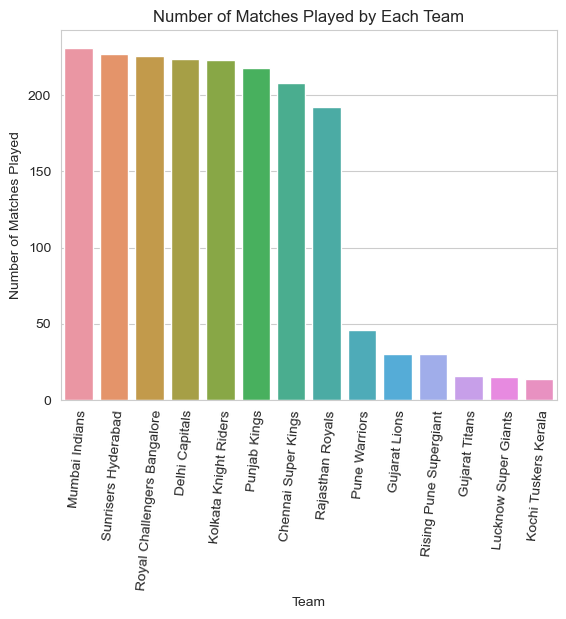

In [19]:
sns.set_style('whitegrid')
sns.barplot(x=num_of_matches_played.index, y=num_of_matches_played.values)

plt.xlabel('Team')
plt.ylabel('Number of Matches Played')
plt.title('Number of Matches Played by Each Team')

plt.xticks(rotation=85)
plt.show()

## -- Number of matches won 

In [20]:
num_of_matches_won = matches['WinningTeam'].value_counts()
num_of_matches_won

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Sunrisers Hyderabad            104
Delhi Capitals                 103
Punjab Kings                   101
Rajasthan Royals                96
Rising Pune Supergiant          15
Gujarat Lions                   13
Gujarat Titans                  12
Pune Warriors                   12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

## -- winning % 

In [21]:
win_percentages = round((num_of_matches_won/num_of_matches_played)*100,2).sort_values(ascending=False)
win_percentages

Gujarat Titans                 75.00
Lucknow Super Giants           60.00
Chennai Super Kings            58.17
Mumbai Indians                 56.71
Kolkata Knight Riders          51.12
Rajasthan Royals               50.00
Rising Pune Supergiant         50.00
Royal Challengers Bangalore    48.23
Punjab Kings                   46.33
Delhi Capitals                 45.98
Sunrisers Hyderabad            45.81
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Pune Warriors                  26.09
dtype: float64

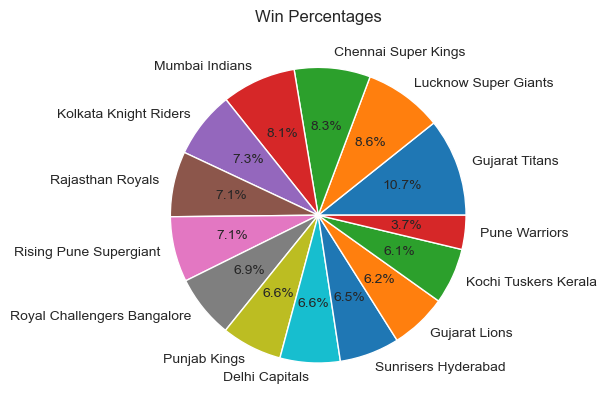

In [22]:
labels = win_percentages.index.tolist()
sizes = win_percentages.tolist()

plt.pie(sizes, labels=labels, autopct='%0.1f%%')

plt.title('Win Percentages')

plt.show()

## -- Top 25 players  with most player of the match

In [23]:
matches['Player_of_Match'].value_counts()[0:25] 

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
G Gambhir         13
AM Rahane         12
SP Narine         12
MEK Hussey        12
A Mishra          12
AD Russell        12
KL Rahul          12
S Dhawan          11
V Sehwag          11
RA Jadeja         11
DR Smith          11
AT Rayudu         10
JC Buttler        10
JH Kallis         10
UT Yadav          10
Name: Player_of_Match, dtype: int64

## -- Total 6's in each season

In [24]:
Total_six= df[df['batsman_run']==6]
Total_six.groupby('Season').count()['batsman_run'].sort_index(ascending=False)

Season
2022    1062
2021     687
2020     736
2019     786
2018     872
2017     706
2016     639
2015     692
2014     715
2013     681
2012     733
2011     639
2010     587
2009     508
2008     623
Name: batsman_run, dtype: int64

## -- Total 4's in each season

In [25]:
Total_four= df[df['batsman_run']==4]
Total_four.groupby('Season').count()['batsman_run'].sort_index(ascending=False)

Season
2022    2020
2021    1551
2020    1589
2019    1655
2018    1652
2017    1612
2016    1633
2015    1611
2014    1563
2013    2054
2012    1911
2011    1916
2010    1709
2009    1321
2008    1703
Name: batsman_run, dtype: int64

## -- Top 20  Highest  Team score  in IPL history

In [26]:
highest_score = df.groupby(['Season','ID','BattingTeam']).sum()['total_run'].sort_values(ascending=False)[:20].reset_index().set_index('Season').drop('ID',axis=1)
highest_score

,BattingTeam,total_run
Season,,
2013,Royal Challengers Bangalore,263
2016,Royal Challengers Bangalore,248
2010,Chennai Super Kings,246
2018,Kolkata Knight Riders,245
2008,Chennai Super Kings,240
2021,Mumbai Indians,235
2015,Royal Challengers Bangalore,235
2011,Punjab Kings,232
2019,Kolkata Knight Riders,232


## -- Most 6's score in ipl

In [27]:
df[df['batsman_run'] == 6].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
CH Gayle          359
AB de Villiers    253
RG Sharma         241
MS Dhoni          229
KA Pollard        224
V Kohli           219
DA Warner         216
SK Raina          204
SR Watson         190
RV Uthappa        182
Name: batsman_run, dtype: int64

## -- Most 4's score in ipl

In [28]:
df[df['batsman_run'] == 4].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
S Dhawan          701
V Kohli           581
DA Warner         577
RG Sharma         519
SK Raina          506
G Gambhir         492
RV Uthappa        481
AM Rahane         431
KD Karthik        426
AB de Villiers    414
Name: batsman_run, dtype: int64

## -- Most 6's in death overs

In [29]:
df[(df['batsman_run'] == 6) & (df['overs']>=16)].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
MS Dhoni          173
KA Pollard        144
AB de Villiers    140
AD Russell         95
RG Sharma          90
V Kohli            79
HH Pandya          76
KD Karthik         75
Yuvraj Singh       68
DA Miller          67
Name: batsman_run, dtype: int64

## -- most 6's in last over

In [30]:
df[(df['batsman_run'] == 6) & (df['overs']==20)].groupby('batter').count()['batsman_run'].sort_values(ascending=False).head(10) 

batter
MS Dhoni           52
KA Pollard         33
RA Jadeja          26
HH Pandya          25
RG Sharma          23
AB de Villiers     19
DA Miller          17
KD Karthik         16
Harbhajan Singh    15
DJ Bravo           15
Name: batsman_run, dtype: int64

## -- Most 4's in death overs

In [31]:
df[(df['batsman_run'] == 4) & (df['overs']>=16)].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
MS Dhoni          224
KD Karthik        141
AB de Villiers    135
KA Pollard        129
RG Sharma         123
RA Jadeja         103
YK Pathan          93
V Kohli            92
HH Pandya          82
AT Rayudu          82
Name: batsman_run, dtype: int64

## -- most 4's in last over

In [32]:
df[(df['batsman_run'] == 4) & (df['overs']==20)].groupby('batter').count()['batsman_run'].sort_values(ascending=False).head(10) 

batter
MS Dhoni      48
KA Pollard    26
PP Chawla     23
KD Karthik    22
RG Sharma     18
MK Tiwary     17
HH Pandya     16
V Kohli       15
MP Stoinis    15
B Kumar       15
Name: batsman_run, dtype: int64

## -- Most 6's in powerplay

In [33]:
df[(df['batsman_run'] == 6) & (df['overs']<=6)].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
CH Gayle       145
DA Warner       89
S Dhawan        71
BB McCullum     70
Q de Kock       65
RG Sharma       63
KL Rahul        62
JC Buttler      55
SK Raina        55
SR Watson       54
Name: batsman_run, dtype: int64

## -- Most 6's in 1st over

In [34]:
df[(df['batsman_run'] == 6) & (df['overs']==1)].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
CH Gayle       14
V Sehwag       12
RG Sharma      11
BB McCullum    10
KL Rahul        9
V Kohli         7
DA Warner       6
SP Narine       6
NV Ojha         5
JD Ryder        4
Name: batsman_run, dtype: int64

## -- Most 4's in powerplay

In [35]:
df[(df['batsman_run'] == 4) & (df['overs']<=6)].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
S Dhawan      415
DA Warner     370
G Gambhir     310
PA Patel      283
AM Rahane     273
V Kohli       271
CH Gayle      267
RV Uthappa    261
V Sehwag      230
SK Raina      198
Name: batsman_run, dtype: int64

## --  Most 4's in 1st over

In [36]:
df[(df['batsman_run'] == 4) & (df['overs']==1)].groupby('batter').count()['batsman_run'].sort_values(ascending=False)[:10]

batter
S Dhawan        62
AM Rahane       49
AC Gilchrist    49
DA Warner       49
V Kohli         47
V Sehwag        42
DR Smith        41
PA Patel        41
CH Gayle        41
G Gambhir       40
Name: batsman_run, dtype: int64

## -- Total Wickets in IPL

In [37]:
total_wickets=df[df['kind'].isin(dismissal)]
total_wickets.groupby('bowler')['kind'].count().sort_values(ascending=False)[:20]

bowler
DJ Bravo           183
SL Malinga         170
YS Chahal          166
A Mishra           166
R Ashwin           157
PP Chawla          157
B Kumar            154
SP Narine          152
Harbhajan Singh    150
JJ Bumrah          148
UT Yadav           135
RA Jadeja          132
Sandeep Sharma     114
Rashid Khan        112
A Nehra            106
R Vinay Kumar      105
Z Khan             102
K Rabada           102
AR Patel           101
Mohammed Shami      99
Name: kind, dtype: int64

## -- Most wickets in death overs

In [38]:
out_death_over=df[df['kind'].isin(dismissal)]
out_death_over = out_death_over[df['overs']>=16]

C:\Users\YUDHISTER\AppData\Local\Temp\ipykernel_14248\1276161961.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_death_over = out_death_over[df['overs']>=16]


In [39]:
wickets_death_over = out_death_over.groupby('bowler')['kind'].count().sort_values(ascending=False)
wickets_death_over.head(20)

bowler
DJ Bravo          115
SL Malinga        108
B Kumar            90
JJ Bumrah          80
SP Narine          67
CH Morris          58
K Rabada           57
Mohammed Shami     57
A Nehra            54
DW Steyn           50
UT Yadav           50
R Vinay Kumar      47
HV Patel           46
JD Unadkat         46
RP Singh           45
YS Chahal          43
SR Watson          42
MM Sharma          41
TA Boult           40
Sandeep Sharma     39
Name: kind, dtype: int64

## -- Most wickets in powerplay

In [40]:
out_powerplay=df[df['kind'].isin(dismissal)]
out_powerplay = out_powerplay[df['overs']<=6]

C:\Users\YUDHISTER\AppData\Local\Temp\ipykernel_14248\2536856661.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_powerplay = out_powerplay[df['overs']<=6]


In [41]:
wickets_powerplay = out_powerplay.groupby('bowler')['kind'].count().sort_values(ascending=False)
wickets_powerplay.head(20)

bowler
B Kumar           55
Sandeep Sharma    54
UT Yadav          53
Z Khan            52
R Ashwin          46
DS Kulkarni       44
I Sharma          44
DL Chahar         43
A Nehra           40
P Kumar           40
TA Boult          40
SL Malinga        37
M Morkel          36
RP Singh          35
MM Sharma         35
DW Steyn          34
JA Morkel         34
SR Watson         34
AB Dinda          33
MJ McClenaghan    31
Name: kind, dtype: int64

## -- Individual highest score in IPL history

In [42]:
df.groupby(['ID','batter'])['batsman_run'].sum().sort_values(ascending=False).reset_index().set_index('batter').drop('ID',axis=1)[:15]

,batsman_run
batter,
CH Gayle,175
BB McCullum,158
Q de Kock,140
AB de Villiers,133
KL Rahul,132
AB de Villiers,129
RR Pant,128
CH Gayle,128
M Vijay,127


## --  number of centuries hit by player

In [43]:
grouped_df = df.groupby(['ID','batter'])['batsman_run'].sum().sort_values(ascending=False)
df_result = grouped_df.to_frame()
df_result[df_result['batsman_run']>=100].groupby('batter').count()['batsman_run'].sort_values(ascending=False).head(15)

batter
CH Gayle          6
JC Buttler        5
V Kohli           5
DA Warner         4
KL Rahul          4
SR Watson         4
AB de Villiers    3
SV Samson         3
AM Rahane         2
S Dhawan          2
BA Stokes         2
BB McCullum       2
AC Gilchrist      2
V Sehwag          2
HM Amla           2
Name: batsman_run, dtype: int64

## --  number of half-centuries hit by player

In [44]:
df_result[(df_result['batsman_run']>=50)&(df_result['batsman_run']<100)].groupby('batter').count()['batsman_run'].sort_values(ascending=False).head(15) 

batter
DA Warner         55
S Dhawan          47
V Kohli           45
AB de Villiers    41
RG Sharma         40
SK Raina          39
G Gambhir         36
CH Gayle          32
KL Rahul          31
AM Rahane         28
RV Uthappa        27
F du Plessis      25
MS Dhoni          24
AT Rayudu         22
MK Pandey         21
Name: batsman_run, dtype: int64

## -- most 6's hit by batsman in each season of IPL


In [45]:
batsman_six = df[df['batsman_run']==6]

In [46]:
batsman_six = batsman_six.groupby(['Season','batter']).count()['batsman_run'].reset_index().sort_values(by=['Season', 'batsman_run'], ascending=False)
batsman_six.groupby('Season').head(1).set_index('Season')

,batter,batsman_run
Season,,
2022,JC Buttler,45
2021,KL Rahul,30
2020,Ishan Kishan,30
2019,AD Russell,52
2018,RR Pant,37
2017,DA Warner,26
2016,V Kohli,38
2015,CH Gayle,38
2014,GJ Maxwell,36


## -- most 4's hit by batsman in each season of IPL


In [47]:
batsman_four = df[df['batsman_run']==4]

In [48]:
batsman_four= batsman_four.groupby(['Season','batter']).count()['batsman_run'].reset_index().sort_values(by=['Season', 'batsman_run'], ascending=False)
batsman_four.groupby('Season').head(1).set_index('Season')

,batter,batsman_run
Season,,
2022,JC Buttler,84
2021,RD Gaikwad,64
2020,S Dhawan,67
2019,S Dhawan,64
2018,RR Pant,68
2017,DA Warner,63
2016,DA Warner,88
2015,DA Warner,65
2014,RV Uthappa,74


## -- Season Wise highest Score of top 3 Batsman 

In [49]:
Season_Wise_Score = df.groupby(['Season','batter'])['batsman_run'].sum().reset_index().sort_values(by=['Season', 'batsman_run'], ascending=False).set_index('Season')
Season_Wise_Score = Season_Wise_Score.groupby('Season').head(3)
Season_Wise_Score

,batter,batsman_run
Season,,
2022,JC Buttler,863
2022,KL Rahul,616
2022,Q de Kock,508
2021,RD Gaikwad,635
2021,F du Plessis,633
2021,KL Rahul,626
2020,KL Rahul,676
2020,S Dhawan,618
2020,DA Warner,548


## --  stadium with most matches played

In [50]:
venue_counts = matches['Venue'].value_counts()
venue_counts

Wankhede Stadium                                       104
Eden Gardens                                            79
MA Chidambaram Stadium                                  67
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium                      64
Feroz Shah Kotla                                        60
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Dr DY Patil Sports Academy                              37
Maharashtra Cricket Association Stadium                 35
Punjab Cricket Association Stadium                      35
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Brabourne Stadium                                       27
Punjab Cricket Association IS Bindra Stadium            21
Arun Jaitley Stadium                                    18
Subrata Roy Sahara Stadium                              

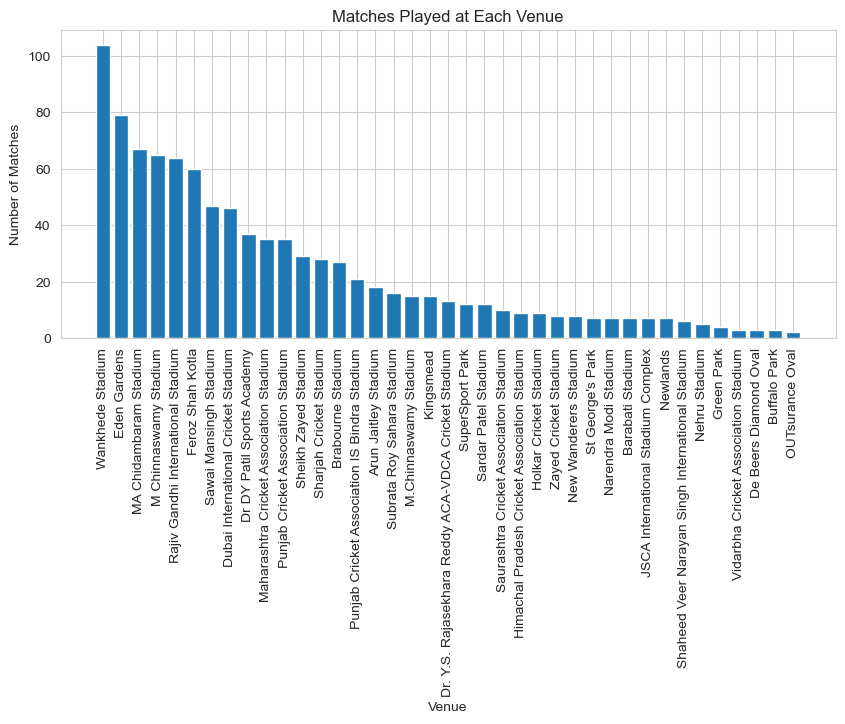

In [51]:
x = venue_counts.index.tolist()
y = venue_counts.tolist()

plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.title('Matches Played at Each Venue')

plt.show()

In [52]:
df.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,Narendra Modi Stadium,Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [53]:
def total_runs(batter):
    total_runs = df[df['batter']==batter]
    return total_runs.groupby('Season').sum()['batsman_run']
    

In [54]:
total_runs('V Kohli') # score of virat kohli in each season

Season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    530
2019    464
2020    471
2021    405
2022    341
Name: batsman_run, dtype: int64

## -- Total runs of top 25 scorer in IPL 

In [55]:
df.groupby('batter')['batsman_run'].sum('batsman_run').sort_values(ascending=False)[:20]

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
G Gambhir         4217
AT Rayudu         4190
AM Rahane         4074
KL Rahul          3895
SR Watson         3880
MK Pandey         3657
SV Samson         3526
KA Pollard        3437
F du Plessis      3403
YK Pathan         3222
Name: batsman_run, dtype: int64

## -- Bowler with most number of dot balls

In [56]:
delivery_dot = delivery[delivery['total_run']==0]
delivery_dot.groupby('bowler')['total_run'].count().sort_values(ascending=False)[:10]

bowler
B Kumar            1385
R Ashwin           1377
SP Narine          1363
Harbhajan Singh    1263
A Mishra           1150
SL Malinga         1144
PP Chawla          1140
UT Yadav           1090
JJ Bumrah          1084
P Kumar            1075
Name: total_run, dtype: int64

## -- most number of times batsman out as 'caught'

In [57]:
delivery['kind'].value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: kind, dtype: int64

In [58]:
caught_out = delivery[delivery['kind']=='caught']
caught_out.groupby('batter').count()['player_out'].sort_values(ascending=False)[:20]

batter
RG Sharma         135
RV Uthappa        124
V Kohli           120
SK Raina          116
S Dhawan          104
KD Karthik        100
DA Warner          91
MS Dhoni           87
AT Rayudu          86
KA Pollard         86
Yuvraj Singh       84
CH Gayle           82
SV Samson          82
AM Rahane          80
G Gambhir          80
AB de Villiers     78
YK Pathan          76
MK Pandey          74
PA Patel           71
SR Watson          70
Name: player_out, dtype: int64

## -- most number of times batsman out as 'bowled'

In [59]:
bowled = delivery[delivery['kind']=='bowled']
bowled.groupby('batter').count()['player_out'].sort_values(ascending=False)[:20]

batter
S Dhawan          37
SR Watson         36
V Kohli           36
MK Pandey         29
G Gambhir         27
AT Rayudu         26
DA Warner         26
KD Karthik        26
CH Gayle          25
RG Sharma         24
AJ Finch          24
AB de Villiers    24
PA Patel          22
MA Agarwal        21
WP Saha           21
KA Pollard        20
M Vijay           19
AM Rahane         19
MS Dhoni          19
DR Smith          18
Name: player_out, dtype: int64

## -- most number of times batsman out as 'run out'

In [60]:
run_out = delivery[delivery['kind']=='run out']
run_out.groupby('batter').count()['player_out'].sort_values(ascending=False)[:20]

batter
MS Dhoni      24
RG Sharma     20
V Kohli       19
KD Karthik    18
S Dhawan      16
G Gambhir     15
KA Pollard    14
RV Uthappa    13
SK Raina      12
AT Rayudu     12
YK Pathan     12
RA Jadeja     11
PA Patel      11
RR Pant       10
DA Warner     10
SPD Smith     10
SR Watson      9
AM Nayar       9
IK Pathan      9
JH Kallis      9
Name: player_out, dtype: int64

## -- most number of times batsman out as 'lbw'

In [61]:
lbw = delivery[delivery['kind']=='lbw']
lbw.groupby('batter').count()['player_out'].sort_values(ascending=False)[:20]

batter
RV Uthappa      18
KD Karthik      17
BB McCullum     16
AM Rahane       15
RG Sharma       13
S Dhawan        12
PA Patel        12
DR Smith        12
V Kohli         11
M Vijay         10
CH Gayle        10
SR Tendulkar     8
KA Pollard       8
SK Raina         7
DA Miller        7
G Gambhir        7
SV Samson        7
KL Rahul         7
MK Tiwary        7
AJ Finch         7
Name: player_out, dtype: int64

In [62]:
matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [63]:
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

## -- how many 6's have hit by team in each over

In [64]:
sixes = delivery[delivery['batsman_run']==6]
sixes_in_overs=sixes.pivot_table(index=['BattingTeam'],columns=['overs'],values='batsman_run',aggfunc='count')
print(sixes_in_overs)

overs                          1     2     3     4     5     6     7     8   \
BattingTeam                                                                   
Chennai Super Kings           9.0  29.0  58.0  62.0  63.0  75.0  39.0  33.0   
Delhi Capitals               17.0  33.0  55.0  63.0  54.0  46.0  31.0  46.0   
Gujarat Lions                 4.0   6.0  14.0   9.0  11.0  12.0  10.0   6.0   
Gujarat Titans                1.0   2.0   1.0   2.0   4.0   2.0   5.0   3.0   
Kochi Tuskers Kerala          2.0   4.0   3.0   3.0   3.0   3.0   2.0   2.0   
Kolkata Knight Riders        22.0  40.0  44.0  50.0  50.0  60.0  43.0  55.0   
Lucknow Super Giants          1.0   1.0   3.0   5.0   8.0   6.0   3.0   4.0   
Mumbai Indians               23.0  31.0  45.0  55.0  71.0  71.0  29.0  44.0   
Pune Warriors                 5.0   6.0   6.0   7.0   7.0   3.0   5.0  10.0   
Punjab Kings                 22.0  41.0  52.0  62.0  56.0  65.0  45.0  52.0   
Rajasthan Royals             23.0  22.0  35.0  53.0 

<AxesSubplot:xlabel='overs', ylabel='BattingTeam'>

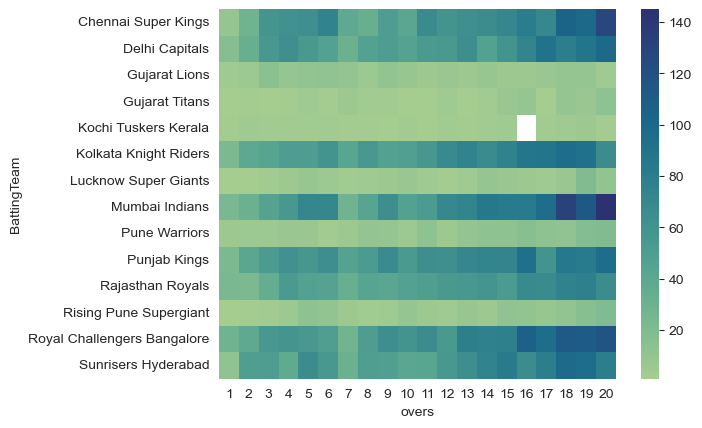

In [65]:
sns.heatmap(sixes_in_overs,cmap="crest")

## -- most destructive player ( having good strike rate  ) in death overs
strike rate = (number of runs / number of balls) *100

base criteria is player has played 200 balls, (between 16 and 20 overs he has completed 200 balls)

In [66]:
df1 = delivery[delivery['overs']>15]

In [67]:
a = df1.groupby('batter')['batsman_run'].count()  # counting numbers of balls

In [68]:
b = df1.groupby('batter')['batsman_run'].count()>200
c=a[b].index.tolist()

In [69]:
c

['A Mishra',
 'AB de Villiers',
 'AD Mathews',
 'AD Russell',
 'AM Rahane',
 'AR Patel',
 'AT Rayudu',
 'B Kumar',
 'BJ Hodge',
 'CH Gayle',
 'CH Morris',
 'DA Miller',
 'DA Warner',
 'DJ Bravo',
 'DJ Hooda',
 'DJ Hussey',
 'DPMD Jayawardene',
 'DT Christian',
 'EJG Morgan',
 'F du Plessis',
 'GJ Maxwell',
 'HH Pandya',
 'Harbhajan Singh',
 'IK Pathan',
 'JA Morkel',
 'JC Buttler',
 'JH Kallis',
 'JP Duminy',
 'JP Faulkner',
 'KA Pollard',
 'KD Karthik',
 'KH Pandya',
 'KL Rahul',
 'KM Jadhav',
 'KS Williamson',
 'LRPL Taylor',
 'MC Henriques',
 'MK Pandey',
 'MK Tiwary',
 'MP Stoinis',
 'MS Dhoni',
 'Mandeep Singh',
 'N Pooran',
 'N Rana',
 'NV Ojha',
 'P Kumar',
 'PP Chawla',
 'R Ashwin',
 'R Parag',
 'R Tewatia',
 'R Vinay Kumar',
 'RA Jadeja',
 'RG Sharma',
 'RR Pant',
 'RV Uthappa',
 'S Badrinath',
 'S Dhawan',
 'SA Yadav',
 'SK Raina',
 'SO Hetmyer',
 'SPD Smith',
 'SR Watson',
 'SS Iyer',
 'SS Tiwary',
 'STR Binny',
 'SV Samson',
 'Shakib Al Hasan',
 'V Kohli',
 'V Shankar',
 'W

In [70]:
df2=df1[df1['batter'].isin(c)] 

In [71]:
runs=df2.groupby('batter')['batsman_run'].sum()
balls=df2.groupby('batter')['batsman_run'].count()

In [72]:
strike_rate = round((runs/balls)*100,3).sort_values(ascending=False)
strike_rate.head(20)

batter
AB de Villiers    215.456
CH Gayle          191.118
RR Pant           189.448
JC Buttler        187.747
AD Russell        184.441
SV Samson         180.571
SR Watson         180.478
DA Warner         179.518
V Kohli           179.034
KL Rahul          176.263
DJ Hussey         175.214
RG Sharma         175.059
F du Plessis      173.702
DA Miller         172.397
JH Kallis         170.563
N Rana            169.524
Yuvraj Singh      169.346
GJ Maxwell        168.301
DJ Bravo          167.712
MS Dhoni          166.869
Name: batsman_run, dtype: float64

## -- most destructive player ( having good strike rate  ) in powerplay

In [73]:
df3 = delivery[delivery['overs']<=6]

In [74]:
a = df3.groupby('batter')['batsman_run'].count()  # counting numbers of balls

In [75]:
b = df3.groupby('batter')['batsman_run'].count()>200
c=a[b].index.tolist()

In [76]:
c

['AB de Villiers',
 'AC Gilchrist',
 'AJ Finch',
 'AM Rahane',
 'AP Tare',
 'AT Rayudu',
 'Abhishek Sharma',
 'BB McCullum',
 'CA Lynn',
 'CA Pujara',
 'CH Gayle',
 'D Padikkal',
 'DA Warner',
 'DPMD Jayawardene',
 'DR Smith',
 'E Lewis',
 'F du Plessis',
 'G Gambhir',
 'GC Smith',
 'GJ Maxwell',
 'HH Gibbs',
 'HM Amla',
 'Ishan Kishan',
 'JC Buttler',
 'JD Ryder',
 'JH Kallis',
 'JM Bairstow',
 'JP Duminy',
 'KC Sangakkara',
 'KD Karthik',
 'KK Nair',
 'KL Rahul',
 'KP Pietersen',
 'KS Williamson',
 'LMP Simmons',
 'M Vijay',
 'M Vohra',
 'MA Agarwal',
 'MEK Hussey',
 'MK Pandey',
 'MK Tiwary',
 'ML Hayden',
 'MS Bisla',
 'Mandeep Singh',
 'N Rana',
 'NV Ojha',
 'PA Patel',
 'PC Valthaty',
 'PP Shaw',
 'Q de Kock',
 'R Dravid',
 'RA Tripathi',
 'RD Gaikwad',
 'RG Sharma',
 'RR Pant',
 'RV Uthappa',
 'S Badrinath',
 'S Dhawan',
 'S Sohal',
 'SA Asnodkar',
 'SA Yadav',
 'SC Ganguly',
 'SE Marsh',
 'SK Raina',
 'SP Narine',
 'SPD Smith',
 'SR Tendulkar',
 'SR Watson',
 'SS Iyer',
 'ST Ja

In [77]:
df4=df3[df3['batter'].isin(c)] 

In [78]:
runs=df4.groupby('batter')['batsman_run'].sum()
balls=df4.groupby('batter')['batsman_run'].count()

In [79]:
strike_rate = round((runs/balls)*100,3).sort_values(ascending=False)
strike_rate.head(20)

batter
SP Narine          166.250
PP Shaw            143.456
JM Bairstow        142.710
YK Pathan          141.016
E Lewis            140.940
CA Lynn            140.868
JC Buttler         139.456
RA Tripathi        137.633
V Sehwag           137.328
SA Yadav           136.142
YBK Jaiswal        134.066
DA Warner          131.785
JD Ryder           131.737
KP Pietersen       130.233
GJ Maxwell         130.112
CH Gayle           129.930
WP Saha            129.773
Abhishek Sharma    129.004
SK Raina           128.926
SA Asnodkar        128.704
Name: batsman_run, dtype: float64

## -- most economical bowler in death overs
Economy rate = runs conceeded / overs bowled

Example if a bowler has given 35 runs in 3.1 overs
so his overs bowled will be calculated as 3+1/6 = 3.1666
and Economy rate would be 35/3.166 = 11.054

In [80]:
delivery.columns


Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [81]:
df1 = delivery[delivery['overs']>15]


In [82]:
a=df1.groupby('bowler')['total_run'].count() # number of balls bowled by each bowler
a.sort_values(ascending=False)

bowler
DJ Bravo           1463
B Kumar            1227
JJ Bumrah          1195
SL Malinga         1174
SP Narine           970
                   ... 
DG Nalkande           1
AA Jhunjhunwala       1
YBK Jaiswal           1
JM Kemp               1
Ankit Soni            1
Name: total_run, Length: 400, dtype: int64

In [83]:
b=df1.groupby('bowler')['total_run'].count()>100 #Only need bowlers who bowled more than 100 balls


In [84]:
bowler=a[b].index.tolist() # storing bowler names in a list


In [85]:
new_df=delivery[delivery['bowler'].isin(bowler)]


In [86]:
new_df.shape


(172580, 17)

In [87]:
run=new_df.groupby('bowler')['total_run'].sum()

balls=new_df.groupby('bowler')['total_run'].count()



In [88]:
balls=balls/6
balls

bowler
A Ashish Reddy     45.000000
A Kumble          163.833333
A Mishra          552.833333
A Nehra           329.000000
A Nortje          117.666667
                     ...    
VRV Singh          61.833333
WD Parnell        100.166667
YS Chahal         490.000000
Yuvraj Singh      147.000000
Z Khan            379.333333
Name: total_run, Length: 133, dtype: float64

In [89]:
economy = round(run/balls,3).sort_values().head(20)

In [90]:
economy

bowler
Sohail Tanvir      6.226
Rashid Khan        6.481
A Kumble           6.647
SP Narine          6.667
M Muralitharan     6.698
DW Steyn           6.791
DL Vettori         6.833
R Ashwin           6.853
J Botha            6.922
SL Malinga         7.033
Harbhajan Singh    7.038
JC Archer          7.049
R Sharma           7.059
DP Nannes          7.097
MA Starc           7.108
Iqbal Abdulla      7.158
DE Bollinger       7.160
CV Varun           7.173
KH Pandya          7.186
SK Warne           7.187
Name: total_run, dtype: float64

## -- most economical bowler in powerplay

In [91]:
df2 = delivery[delivery['overs'] <= 6]


In [92]:
a=df2.groupby('bowler')['total_run'].count() # number of balls bowled by each bowler
a.sort_values(ascending=False)
b=df2.groupby('bowler')['total_run'].count()>100 # Only need bowlers who bowled more than 100 balls

In [93]:
bowler=a[b].index.tolist() # storing bowler names in a list


In [94]:
new_df=delivery[delivery['bowler'].isin(bowler)]

In [95]:
new_df.shape

(173986, 17)

In [96]:
run=new_df.groupby('bowler')['total_run'].sum()

balls=new_df.groupby('bowler')['total_run'].count()

In [97]:
balls=balls/6
balls

bowler
A Chandila            39.000000
A Kumble             163.833333
A Mishra             552.833333
A Nehra              329.000000
A Nortje             117.666667
                        ...    
WPUJC Vaas            48.000000
Washington Sundar    154.666667
YK Pathan            197.333333
YS Chahal            490.000000
Z Khan               379.333333
Name: total_run, Length: 156, dtype: float64

In [98]:
economy = round(run/balls,3).sort_values().head(20)
economy

bowler
Mohsin Khan        5.883
Sohail Tanvir      6.226
A Chandila         6.282
Rashid Khan        6.481
SMSM Senanayake    6.492
SM Pollock         6.579
A Kumble           6.647
SP Narine          6.667
GD McGrath         6.675
M Muralitharan     6.698
J Yadav            6.754
DW Steyn           6.791
R Ashwin           6.853
R Rampaul          6.885
J Botha            6.922
SL Malinga         7.033
Harbhajan Singh    7.038
JC Archer          7.049
AD Mascarenhas     7.065
DP Nannes          7.097
Name: total_run, dtype: float64

In [99]:
def most_sixes(batter):
    most_sixes = df[(df['batsman_run']==6) & (df['batter']==batter)]
    return most_sixes.groupby('Season').count()['batsman_run']

In [100]:
most_sixes('CH Gayle').sort_values(ascending=False)

Season
2012    59
2013    52
2011    44
2015    38
2019    34
2018    27
2020    24
2016    21
2010    16
2017    14
2014    12
2009    10
2021     8
Name: batsman_run, dtype: int64